In [1]:
%matplotlib notebook

%config Completer.use_jedi = False

In [2]:
from pathlib import Path

import sys

import os



import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LogNorm
from PIPELINE.convenience_functions import show_image

from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import importlib


import ccdproc


from itertools import groupby

from PIL import Image as P

#general os
import os
import zipfile
import urllib.request

#general plotting
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

params={'legend.fontsize':'18','axes.labelsize':'18',
        'axes.titlesize':'18','xtick.labelsize':'18',
        'ytick.labelsize':'18','lines.linewidth':2,'axes.linewidth':2,'animation.html': 'html5'}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

#table/math handling
import pandas as pd
import numpy as np
np.seterr(all='ignore')  # hides irrelevant warnings about divide-by-zero, etc

#astropy
import astropy
import astropy.units as u
from astropy.table import QTable
from astropy.io import fits,ascii
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models, fitting
from astropy.visualization import quantity_support,astropy_mpl_style, simple_norm
from astropy import constants as const
from astropy.stats import mad_std
from astropy.nddata import CCDData
from astropy.visualization import hist

#specutils
import specutils
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import gaussian_smooth
from specutils.fitting import fit_generic_continuum
from specutils.fitting import find_lines_derivative
from specutils.fitting import find_lines_threshold
from specutils.fitting import fit_lines
from specutils.manipulation import noise_region_uncertainty
from specutils.analysis import centroid
from specutils.analysis import line_flux
from specutils.analysis import equivalent_width
from specutils.analysis import template_comparison

quantity_support();  # auto-recognizes units on matplotlib plots

from ipywidgets import interact
import ipywidgets as widgets

In [3]:
raw_goodman_path = "/Users/danakoeppe/PipelineProjects/Make_FITS_for_SAMOS/SAMI_reduction/GOODMAN_raw_data/"


if not os.path.exists("quicklook_test_products"):
    os.mkdir("quicklook_test_products")
    
procdir = "quicklook_test_products"   
goodman_files =  ccdp.ImageFileCollection(raw_goodman_path)

goodman_files.summary

file,simple,bitpix,naxis,naxis1,naxis2,date-obs,date,time,n_param,param0,param1,param2,param3,param4,param5,param6,param7,param8,param9,param10,param11,param12,param13,param14,param15,param16,param17,param18,param19,param20,param21,param22,param23,param24,param25,param26,param27,param28,param29,param30,param31,param32,param33,param34,param35,param36,param37,param38,param39,param40,param41,param42,param43,param44,param45,param46,param47,param48,param49,param50,param51,param52,param53,param54,param55,param56,param57,param58,param59,param60,param61,param62,param63,param64,param65,param66,param67,param68,param69,param70,param71,param72,param73,param74,param75,param76,param77,param78,param79,telescop,instrume,object,notes,ra,dec,airmass,ut,focus,mount_az,mount_el,rotator,posangle,seeing,lst,obsra,obsdec,cam_ang,grt_ang,cam_targ,grt_targ,cam_foc,coll_foc,filter,filter2,grating,slit,col_temp,cam_temp,exptime,rdnoise,gain,obstype,observer,proposal,equinox,dispaxis,detsize,trimsec,ccdsize,ccdsum,opentime,checksum,datasum,odtacqnm,bunit,bscale,bzero,comment
str26,bool,int64,int64,int64,int64,str23,str10,str26,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str9,str20,str13,str19,str12,str13,float64,str10,float64,float64,float64,float64,float64,float64,str10,str12,str13,float64,float64,float64,float64,int64,int64,str11,str5,str12,str19,float64,float64,float64,float64,float64,str6,str1,str1,float64,int64,str15,str16,str15,str3,object,str16,str10,str52,str3,int64,int64,str39
psg_140319_210352_fri.fits,True,16,2,4142,1896,2014-03-19T21:03:52.430,2014-03-19,21:03:52.43 to 21:03:54.76,80,-106.5,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4142,1,0,1100,1896,1,230,2000,0,330,3,1984,1862,2011,1899,100,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,620,658,2,0,0,2050,0,0,2030,250,0,500,0,1630.0,1660.0,1730.0,0,1,0,0,5000.0,100.0,0,0,0,8388607,8388607,8388607,8388607,0,0,10000,SOAR 4.1m,Goodman Spectrograph,qflat,400m2 GG455,04:15:06.852,-30:13:46.455,1.0,21:03:51.7,-1395.11,89.9995,88.5072,0.0,360.0,-1.0,04:10:15.7,04:13:24.164,-30:13:35.702,16.10004,7.5001,16.1,7.5,576,1001,<NO FILTER>,GG455,SYZY_400,Ori0B1-field2-0000R,12.375,15.34375,2.0,3.99,2.06,FLAT,,,2000.0,1,"[1:4096,1:4096]","[30:4110,1:1896]","[1:4096,1:4096]",1 1,21:03:52.912,C5o2C2m2C2m2C2m2,3847477586,/user/observer/today/0039.qflat_400m2_GG455.fits,adu,1,32768,"Triggered Acquisition, Exp Time= 02"
psg_140319_210620_fri.fits,True,16,2,4142,1896,2014-03-19T21:06:20.720,2014-03-19,21:06:20.72 to 21:06:22.98,80,-106.5,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4142,1,0,1100,1896,1,230,2000,0,330,3,1984,1862,2011,1899,100,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,620,658,2,0,0,2050,0,0,2030,250,0,500,0,1630.0,1660.0,1730.0,0,1,0,0,5000.0,100.0,0,0,0,8388607,8388607,8388607,8388607,0,0,10000,SOAR 4.1m,Goodman Spectrograph,qflat,400m2 GG455,04:17:35.117,-30:13:43.821,1.0,21:06:19.7,-1395.11,89.9995,88.5072,0.0,360.0,-1.0,04:12:44.1,04:13:24.164,-30:13:35.702,16.09997,7.5001,16.1,7.5,576,1001,<NO FILTER>,GG455,SYZY_400,Ori0B1-field2-0000R,12.390625,15.390625,2.0,3.99,2.06,FLAT,,,2000.0,1,"[1:4096,1:4096]","[30:4110,1:1896]","[1:4096,1:4096]",1 1,21:06:21.149,cAGAe097c7GAc795,116232393,/user/observer/today/0040.qflat_400m2_GG455.fits,adu,1,32768,"Triggered Acquisition, Exp Time= 02"
psg_140319_210744_fri.fits,True,16,2,4142,1896,2014-03-19T21:07:44.260,2014-03-19,21:07:44.26 to 21:07:46.58,80,-106.5,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4142,1,0,1100,1896,1,230,2000,0,330,3,1984,1862,2011,1899,100,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,620,658,2,0,0,2050,0,0,2030,250,0,500,0,1630.0,1660.0,1730.0,0,1,0,0,5000

In [4]:
slit_mask_name = goodman_files.summary["slit"][0]


for snames in goodman_files.summary["slit"]:
    
    print(snames)
slit_mask_name

Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R
Ori0B1-field2-0000R


'Ori0B1-field2-0000R'

In [5]:
raw_flat_list = []
raw_comp_list = []
raw_obj_list = []



for img in goodman_files.files:
    ccd = CCDData.read(os.path.join(raw_goodman_path,img))
    
    if ccd.header['obstype']=="FLAT":
        raw_flat_list.append(ccd)
        
    elif ccd.header['obstype']=="COMP":
        raw_comp_list.append(ccd)
        
    elif ccd.header['obstype']=="OBJECT":
        raw_obj_list.append(ccd)
        
        
        
        
raw_test_obj = raw_obj_list[0]

raw_ori_data = raw_test_obj.data
image_shape = raw_test_obj.shape

raw_test_flat = raw_flat_list[0]
raw_flat_data = raw_test_flat.data
norm = simple_norm(raw_ori_data, stretch='log')

<IPython.core.display.Javascript object>


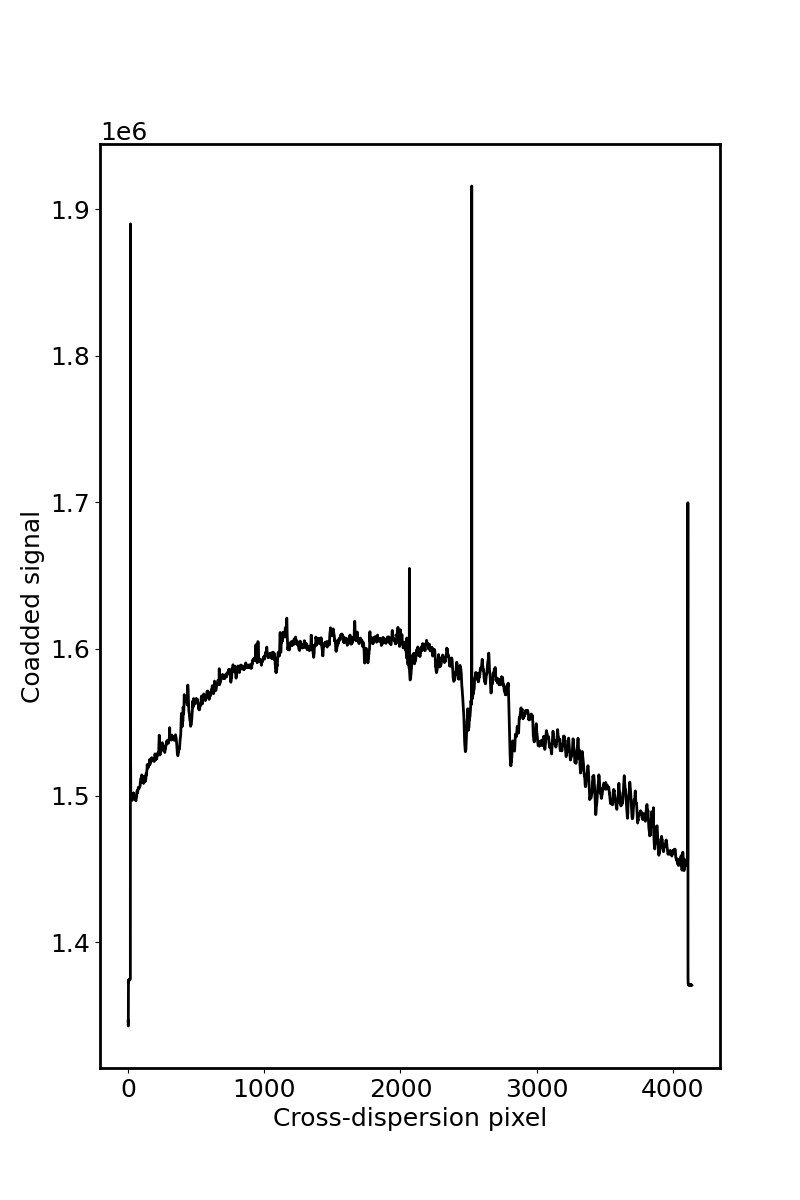

Text(0, 0.5, 'Coadded signal')

In [6]:
fig_raw, pax_raw = plt.subplots(nrows=1, ncols=1, figsize=(8, 12))

xpix = np.arange(image_shape[1])
slice_2 = raw_ori_data.sum(axis=0)

lin_raw, = pax_raw.plot(xpix, slice_2, 'k-')
pax_raw.set_xlabel('Cross-dispersion pixel')
pax_raw.axes.set_ylabel('Coadded signal')

<IPython.core.display.Javascript object>


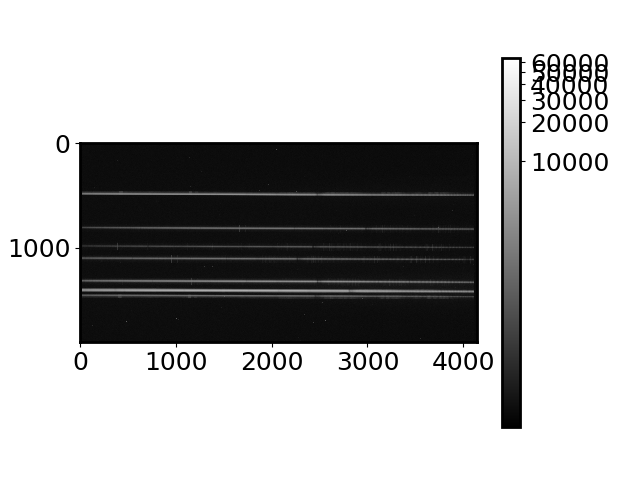

In [7]:
raw_test_obj = raw_obj_list[0]
image_shape = raw_test_obj.shape
norm = simple_norm(raw_test_obj, stretch='log')
aspect_ratio = image_shape[1] / (2 * image_shape[0])
fig1 = plt.figure() # we save these in dummy variables to avoid spurious Jupyter Notebook output
img1 = plt.imshow(raw_test_obj, cmap='gray', aspect=aspect_ratio, 
                  norm=norm, interpolation='none')
clb1 = plt.colorbar()

In [8]:
oscanned_flats = []
oscanned_comps = []
oscanned_objs = []



for bucket in [groups for groups in [raw_flat_list,raw_comp_list,raw_obj_list]]:
    
    for raw_ccd in bucket:
        #print(raw_ccd.header['obstype'])
        trim_section = raw_ccd.header['trimsec']
        x,y = trim_section.strip("[").strip("]").split(",")
        x1,x2 = x.split(":")
        os_x_start = x2
        os_x_end = raw_ccd.data.shape[1]
        osec = "[%s:%s,%s]"%(os_x_start,os_x_end,y)
        os_ccd = ccdp.subtract_overscan(raw_ccd,fits_section=osec,overscan_axis=1)
        tos_ccd = ccdp.trim_image(os_ccd,fits_section=trim_section)
        orig_fname = os.path.split(raw_ccd.header['ODTACQNM'])[1]
        
        new_fname = os.path.join(procdir,"to_"+orig_fname)
        if os.path.exists(new_fname):
            os.remove(new_fname)
        
        tos_ccd.write(new_fname)
        
        if raw_ccd.header['obstype']=="FLAT":
            oscanned_flats.append(tos_ccd)
            
        
        elif raw_ccd.header['obstype']=="COMP":
            oscanned_comps.append(tos_ccd)
        
        elif raw_ccd.header['obstype']=="OBJECT":
            oscanned_objs.append(tos_ccd)

INFO: splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


INFO:astropy:splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes.


(4081,)


<IPython.core.display.Javascript object>


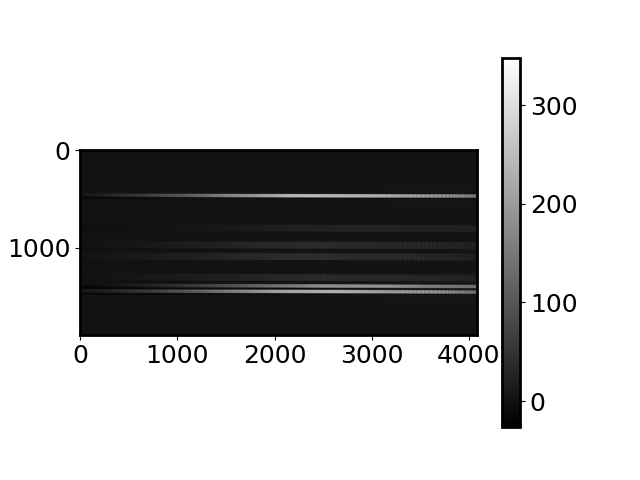

In [9]:
def inv_median(a):
    return 1 / np.median(a)

master_flat = ccdp.combine(oscanned_flats, method='average', scale=inv_median,
                                 sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                                 sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                                 mem_limit=350e6
                                )


order = 15
model_init = models.Chebyshev1D(degree=order)
model_fitter = fitting.LevMarLSQFitter()

# get data shape
x_size, y_size = master_flat.data.shape
x_axis = range(y_size)

profile = np.median(master_flat.data, axis=0)
print(profile.shape)

# do the actual fit
fit = model_fitter(model_init, x_axis, profile)

# convert fit into an array
fit_array = fit(x_axis)

# pythonic way to divide an array by a vector
#master_flat.data = master_flat.data / fit_array[None, :]


flat_mean = master_flat.data.mean() * master_flat.unit
flat_normed = master_flat.divide(flat_mean)

fake_flat_data = np.random.normal(loc=1.0, scale=0.05, size=master_flat.data.shape)

#master_flat = CCDData(fake_flat_data, unit=u.electron)


fig_mflat = plt.figure() # we save these in dummy variables to avoid spurious Jupyter Notebook output
img_mflat = plt.imshow(master_flat, cmap='gray',)
                      #aspect=os_aspect_ratio,norm=os_norm, interpolation='none')
clb_mflat = plt.colorbar()

-172614207.52861726 230816655.52604118


<IPython.core.display.Javascript object>


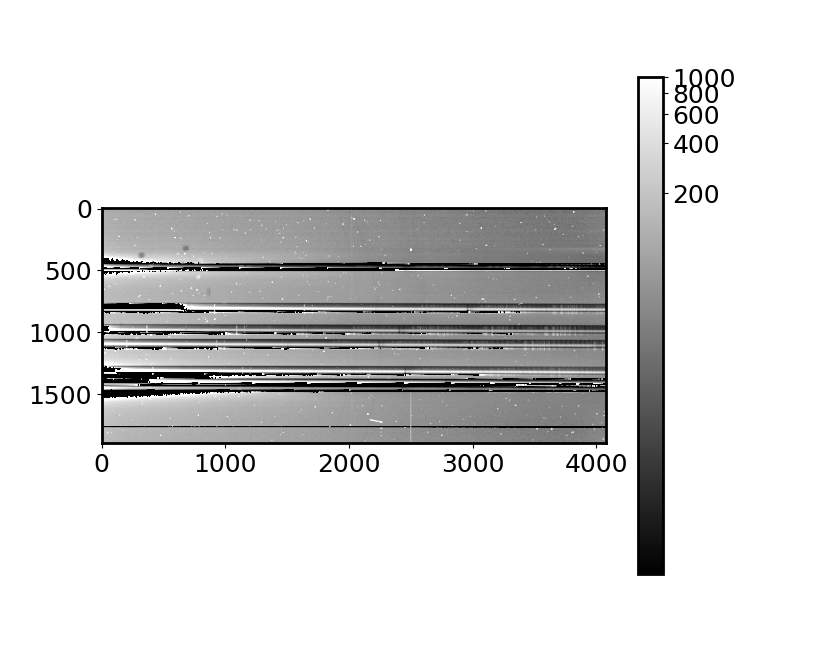

True

In [12]:

flat_corr = ccdp.flat_correct(ccd=os_test_obj, flat=master_flat)#.divide(flat_normed)
reduced_image = ccdproc.flat_correct(os_test_obj, master_flat)
print(flat_corr.data.min(),flat_corr.data.max())
fos_norm = simple_norm(flat_corr, stretch='log',clip=True,min_cut=1,invalid=1,
                       max_cut=1e3)#np.log(flat_corr.data.max()))
fos_aspect_ratio = flat_corr.shape[1] / (2 * flat_corr.shape[0])
fig_fobj = plt.figure() # we save these in dummy variables to avoid spurious Jupyter Notebook output
img_fobj = plt.imshow(flat_corr, cmap='gray',norm=fos_norm)
                      #aspect=fos_aspect_ratio,norm=fos_norm, interpolation='none')
clb_fobj = plt.colorbar()
fos_norm.clip

In [274]:
master_flat.data,flat_corr.data

(array([[1.24343776e+03, 1.23855630e+03, 1.23392306e+03, ...,
         4.01119711e-01, 4.22266125e-01, 4.15775132e-01],
        [1.20356029e+00, 1.19956701e+00, 1.29533457e+00, ...,
         4.07995679e-01, 4.16397480e-01, 4.15324644e-01],
        [1.13763871e+00, 1.23986229e+00, 1.23444632e+00, ...,
         4.27627640e-01, 4.19439392e-01, 4.23732699e-01],
        ...,
        [1.33495260e+00, 1.41738268e+00, 1.33795504e+00, ...,
         4.25302092e-01, 4.23394531e-01, 4.24600180e-01],
        [1.28719201e+00, 1.37628181e+00, 1.24934068e+00, ...,
         4.24999875e-01, 4.27982890e-01, 4.26917935e-01],
        [1.39948044e+00, 1.30085731e+00, 1.29401520e+00, ...,
         4.07759014e-01, 4.20154450e-01, 4.11492643e-01]]),
 array([[ 24.10741051,  23.70703649,  24.89828573, ...,  84.97949599,
          56.5067009 , -40.99205111],
        [ 23.42982313,  23.50781949,  13.8752721 , ...,  18.98803025,
         116.83878435,  -5.96894744],
        [ 40.58610517,  70.23091711,   4.26748675

<IPython.core.display.Javascript object>


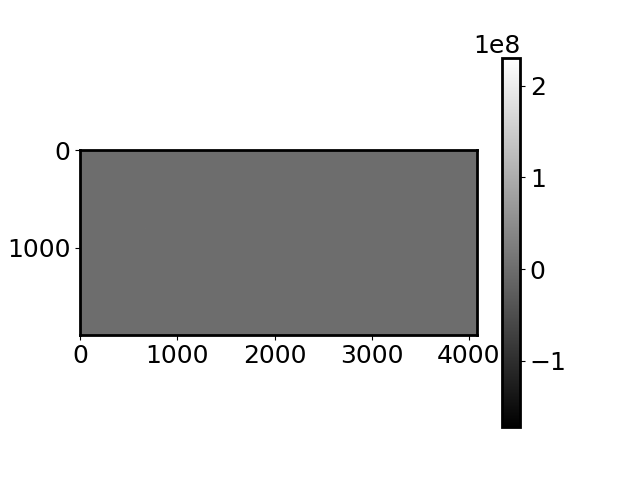

In [11]:
os_test_obj = oscanned_objs[1]
os_test_flt = oscanned_flats[1]

fos_test_obj = ccdp.flat_correct(os_test_obj,flat=flat_normed)

fos_image_shape = fos_test_obj.shape

fos_norm = simple_norm(fos_test_obj, stretch='log',clip=True)
fos_aspect_ratio = fos_image_shape[1] / (2 * fos_image_shape[0])
fig_ftos_ob = plt.figure() # we save these in dummy variables to avoid spurious Jupyter Notebook output
img_ftos_ob = plt.imshow(fos_test_obj, cmap='gray')
clb_ftos_ob = plt.colorbar()



<IPython.core.display.Javascript object>


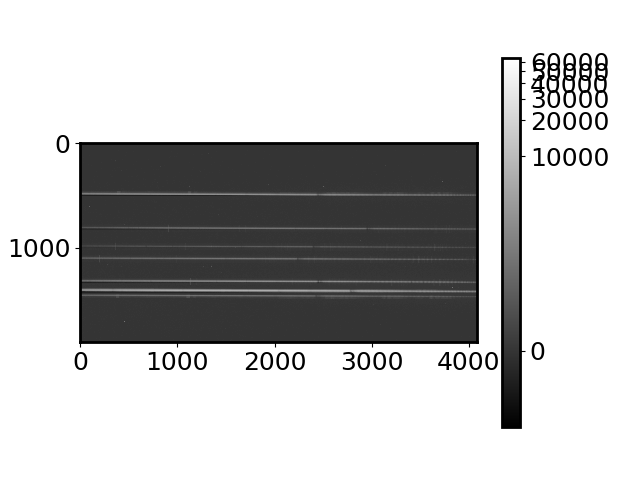

In [15]:
os_test_obj = oscanned_objs[0]
os_test_flt = oscanned_flats[1]
os_image_shape = os_test_obj.shape
os_norm = simple_norm(os_test_obj, stretch='log',clip=True)
os_aspect_ratio = os_image_shape[1] / (2 * os_image_shape[0])
fig_os = plt.figure() # we save these in dummy variables to avoid spurious Jupyter Notebook output
img_os = plt.imshow(os_test_obj, cmap='gray',aspect=os_aspect_ratio,
                  norm=os_norm, interpolation='none')
clb_os = plt.colorbar()

In [16]:
os_test_obj.header.keys

<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4142                                                  
NAXIS2  =                 1896                                                  
DATE-OBS= '2014-03-19T23:56:51.590' / UTC epoch                                 
DATE    = '2014-03-19'         / Date Format is YYYY-MM-DD                      
TIME    = '23:56:51.59 to 00:11:51.82' / ~ Start & Stop of Exposure             
N_PARAM =                   80 / Number of Parameters                           
PARAM0  =               -106.5 / CCD Temperature, C                             
PARAM1  =                    0 / Not Used                                       
PARAM2  =                0.000 / CCD Chamber Pressure,Torr                      

<IPython.core.display.Javascript object>


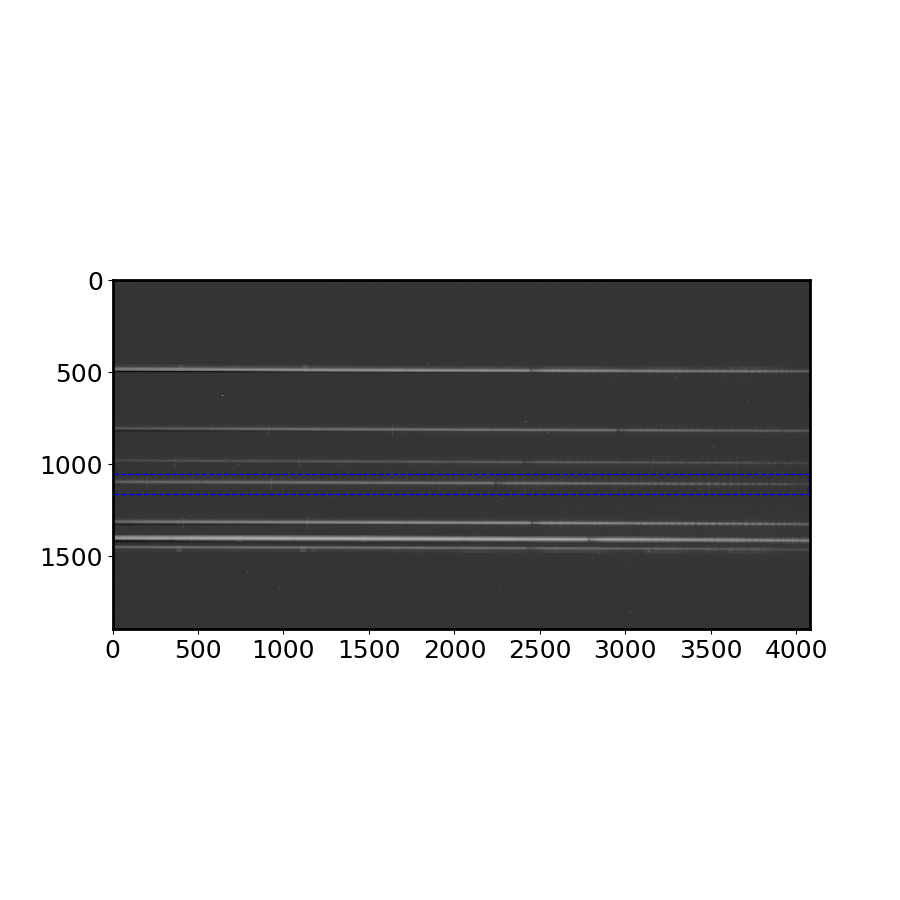

interactive(children=(IntSlider(value=0, description='x1', max=4140), IntSlider(value=0, description='y1', max…

In [17]:
fig2 = plt.figure(figsize=(9,9)) # we want the largest figure that will fit in the notebook
img2 = plt.imshow(os_test_obj, cmap='gray', aspect=os_aspect_ratio, 
                  norm=os_norm, interpolation='none') # reuse norm from earlier

# create region box and slider
region_x = region_y = 0
region_h, region_w = image_shape
region_rectangle = Rectangle((region_x, region_y), region_w, region_h, 
                             facecolor='none', edgecolor='b', linestyle='--')
current_axis = plt.gca()
current_axis.add_patch(region_rectangle)

# interactive widget controls
def region(x1=0, y1=0, x2=region_w-1, y2=region_h-1):
    region_rectangle.set_bounds(x1, y1, x2-x1, y2-y1)
    plt.draw()
    
interact1 = interact(region, x1=(0, region_w-2, 1), y1=(0, region_h-2, 1), 
                    x2=(1, region_w-1, 1), y2=(1, region_h-1, 1))

0 1054 4074 1162


<IPython.core.display.Javascript object>


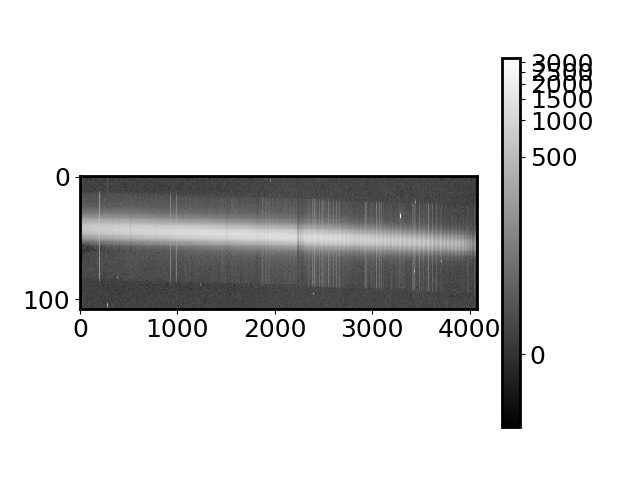

In [18]:
#comment these lines out if interativity is not desired
x, y = region_rectangle.xy
w = region_rectangle.get_width() 
h = region_rectangle.get_height()

#uncomment and set these to your desired extraction region if interativity is not desired
# x = y = 0
# h, w = image_shape

print(x, y, x+w, y+h)

er_y, er_x = np.mgrid[y:y+h, x:x+w]
extraction_region = os_test_obj.data[er_y, er_x]
weights_region = os_test_flt.data[er_y, er_x]
er_ny, er_nx = extraction_region.shape

aspect_ratio = er_nx / (3. * er_ny)

er_norm = simple_norm(extraction_region, stretch='log')
fig3 = plt.figure()
img3 = plt.imshow(extraction_region, cmap='gray', aspect=aspect_ratio, 
                  norm=er_norm, interpolation='none')
clb3 = plt.colorbar()

<IPython.core.display.Javascript object>


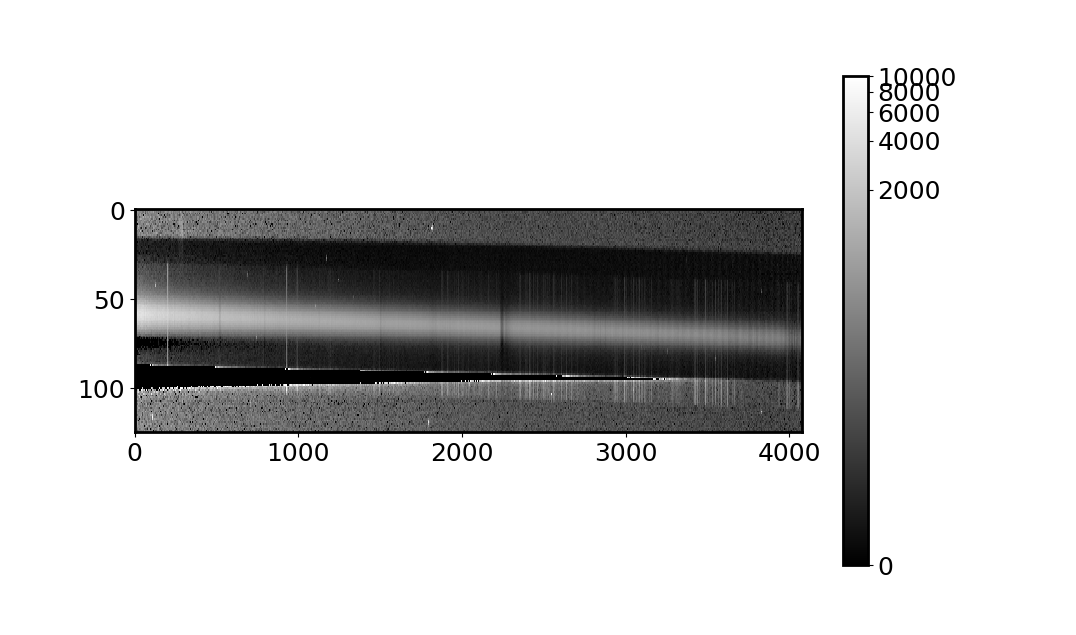

array([[264.6341059 , 457.35573456, 459.53502989, ...,  66.38373261,
         53.55799871,   4.97180657],
       [386.35415744, 482.77730546, 409.56982452, ...,  43.93060851,
         28.33951802,  24.66562597],
       [317.72062109, 189.04000415, 577.41940659, ...,  63.64746064,
         77.30462206,  33.97306832],
       ...,
       [580.25660729, 497.00239842, 417.19179429, ...,  54.86467561,
         73.9258926 ,  33.03038834],
       [614.25313711, 621.43199275, 609.43012225, ...,  40.92714876,
         16.9011844 ,  71.17451643],
       [483.15439771, 153.30065765, 431.0153616 , ...,  32.84010338,
         49.50065353,  50.88405594]])

In [300]:

ccd_er = CCDData(data=extraction_region,unit=u.electron)
ccd_wer = CCDData(data=weights_region,unit=u.electron)
fos_er = ccdp.flat_correct(ccd=ccd_er,flat=ccd_wer,)

fos_er_norm = simple_norm(fos_er, stretch='log',clip=True,min_cut=0,max_cut=10000)

fig34 = plt.figure()
img34 = plt.imshow(fos_er, cmap='gray',
                   aspect=aspect_ratio, norm=fos_er_norm, interpolation='none')
clb34 = plt.colorbar()

fos_er.data

In [17]:
slice_width = 30
initial_column = er_nx // 2

def kernel_slice_coadd(width, column_idx):
    """
    Coadd a number of columns (= width) of the extraction region,
    centered on column_idx.
    """
    
    half_width = width // 2
    to_coadd = np.arange(max(0, column_idx - half_width), 
                         min(er_nx-1, column_idx + half_width))
    print(to_coadd.shape)
    return extraction_region[:, to_coadd].sum(axis=1) / width

slice_0 = kernel_slice_coadd(slice_width, initial_column)
slice_0.shape

(30,)


(125,)

<IPython.core.display.Javascript object>


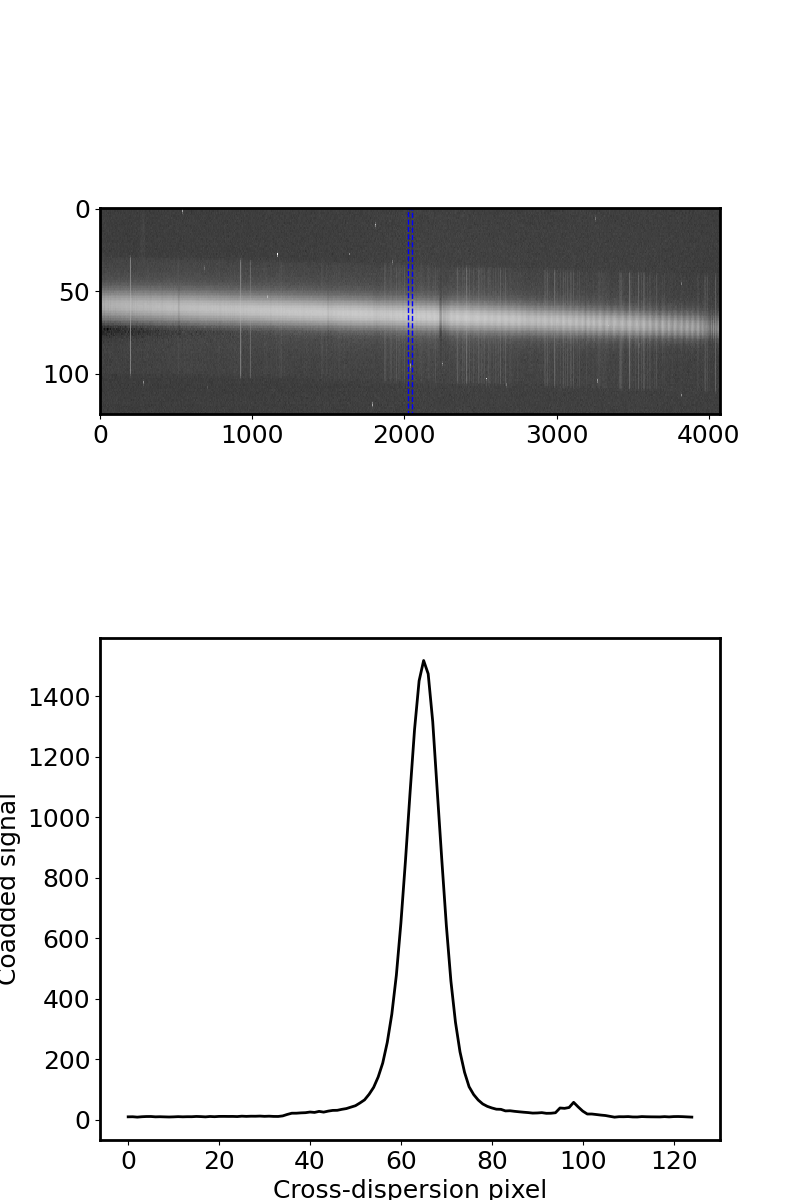

(125,) (125,)


interactive(children=(IntSlider(value=2037, description='column_idx', max=4074), IntSlider(value=30, descripti…

In [59]:
fig4, (iax4, pax4) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
plt.subplots_adjust(hspace=0.15, top=0.95, bottom=0.05)
img4 = iax4.imshow(extraction_region, cmap='gray', aspect=aspect_ratio, 
                  norm=er_norm, interpolation='none')

#create slice box
def make_slice(width, column_idx):
    sy, sh, sw = 0, er_ny, width
    sx = column_idx - width // 2
    return sx, sy, sw, sh

*sxy, sw, sh = make_slice(slice_width, initial_column)
slice_rectangle = Rectangle(sxy, sw, sh, facecolor='none', 
                            edgecolor='b', linestyle='--')
iax4.add_patch(slice_rectangle)

#plot the coadded slice
xd_pixels = np.arange(er_ny)
print(xd_pixels.shape,slice_0.shape)
lin4, = pax4.plot(xd_pixels, slice_0, 'k-')
pax4.set_xlabel('Cross-dispersion pixel')
pax4.axes.set_ylabel('Coadded signal')

column_slider = widgets.IntSlider(initial_column, 0, er_nx-1, 1)
width_slider = widgets.IntSlider(slice_width, 1, er_nx-1, 1)

#interactive controls
def slice_update(column_idx, width):
    #update rectangle
    new_slice_box = make_slice(width, column_idx)
    slice_rectangle.set_bounds(*new_slice_box)
    #update line plot
    lin4.set_ydata(kernel_slice_coadd(width, column_idx))
    #update the axis limits
    pax4.relim()
    pax4.autoscale_view()
    plt.draw()

interact2 = interact(slice_update, column_idx=column_slider, width=width_slider)

In [57]:
kernel_slice = kernel_slice_coadd(width_slider.value, column_slider.value)

(30,)


<IPython.core.display.Javascript object>


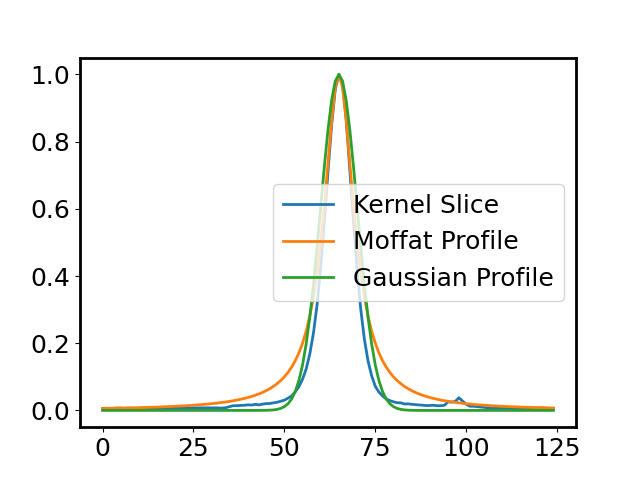

In [60]:
max_pixel = np.argmax(kernel_slice)
fwhm = 5.

moffat_profile = models.Moffat1D(amplitude=1, gamma=fwhm, x_0=max_pixel, alpha=1)
gauss_profile = models.Gaussian1D(amplitude=1, mean=max_pixel, stddev=fwhm)

fig5 = plt.figure()
kern5 = plt.plot(xd_pixels, kernel_slice / kernel_slice[max_pixel], label='Kernel Slice')
moff5 = plt.plot(xd_pixels, moffat_profile(xd_pixels), label='Moffat Profile')
gaus5 = plt.plot(xd_pixels, gauss_profile(xd_pixels), label='Gaussian Profile')
lgd5 = plt.legend()

In [61]:
psf_template = gauss_profile #moffat_profile 
psf_template.amplitude = kernel_slice[max_pixel]
print(psf_template)
# If deblending multiple sources, add more PSF templates here:
print(psf_template.param_names)
psf_txt = "     Model: {:s}\n amplitude: {:5.3f} \n      mean: {:5.3f} \n    stddev: {:5.3f}".format("Gauss",psf_template.amplitude.value,psf_template.mean.value,
                                              psf_template.stddev.value)
print(psf_txt)
psf_moff = moffat_profile
psf_mtmp = "     Model: {:s}\n amplitude: {:5.3f} \n       x_0: {:5.3f} \n     gamma: {:5.3f} \n     alpha: {:5.3f}"

print(psf_mtmp.format("moffat",psf_moff.amplitude.value, 
								   psf_moff.x_0.value, 
								   psf_moff.gamma.value,
								   psf_moff.alpha.value))

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude      mean stddev
    ------------------ ---- ------
    1518.9727272727278 65.0    5.0
('amplitude', 'mean', 'stddev')
     Model: Gauss
 amplitude: 1518.973 
      mean: 65.000 
    stddev: 5.000
     Model: moffat
 amplitude: 1.000 
       x_0: 65.000 
     gamma: 5.000 
     alpha: 1.000


In [62]:
from PyQt5 import QtCore, QtGui,QtWidgets

import numpy as np

#QtWidgets.QGri
np.max((0,11))

11

In [314]:
background_poly = models.Polynomial1D(2)
print(background_poly)

extraction_kernel = psf_template + background_poly
print(extraction_kernel)
kernel_slice

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0  c1  c2
    --- --- ---
    0.0 0.0 0.0
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1518.97272727, mean=65., stddev=5.)>

    [1]: <Polynomial1D(2, c0=0., c1=0., c2=0.)>
Parameters:
       amplitude_0     mean_0 stddev_0 c0_1 c1_1 c2_1
    ------------------ ------ -------- ---- ---- ----
    1518.9727272727278   65.0      5.0  0.0  0.0  0.0


array([   9.46363636,    9.72424242,    8.43939394,    9.75757576,
         10.46363636,   10.53030303,    9.41515152,    9.79393939,
          9.32424242,    8.90909091,    9.38181818,   10.06666667,
          9.48484848,    9.87575758,    9.83030303,   10.72424242,
         10.2030303 ,    9.33030303,   10.62727273,    9.9       ,
         10.87272727,   10.93636364,   10.77272727,   10.81818182,
         10.35151515,   11.61818182,   10.93030303,   11.5030303 ,
         11.3969697 ,   11.92727273,   11.04848485,   11.6030303 ,
         10.81212121,   10.69393939,   12.53636364,   17.39090909,
         21.4       ,   21.45757576,   22.55757576,   23.16969697,
         25.33030303,   24.02424242,   27.48484848,   25.00909091,
         28.37272727,   30.71212121,   31.03333333,   34.22727273,
         36.75757576,   41.53939394,   46.23333333,   55.40909091,
         65.53636364,   84.01212121,  106.91818182,  141.23333333,
        187.37575758,  255.81818182,  349.2       ,  478.03030

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1445.45883729, mean=64.98633946, stddev=3.87788188)>

    [1]: <Polynomial1D(2, c0=-6.31200377, c1=1.4171257, c2=-0.01095585)>
Parameters:
       amplitude_0           mean_0      ...          c2_1        
    ------------------ ----------------- ... ---------------------
    1445.4588372930134 64.98633946237736 ... -0.010955853337539836
Parameter('mean', value=64.98633946237736)


<IPython.core.display.Javascript object>


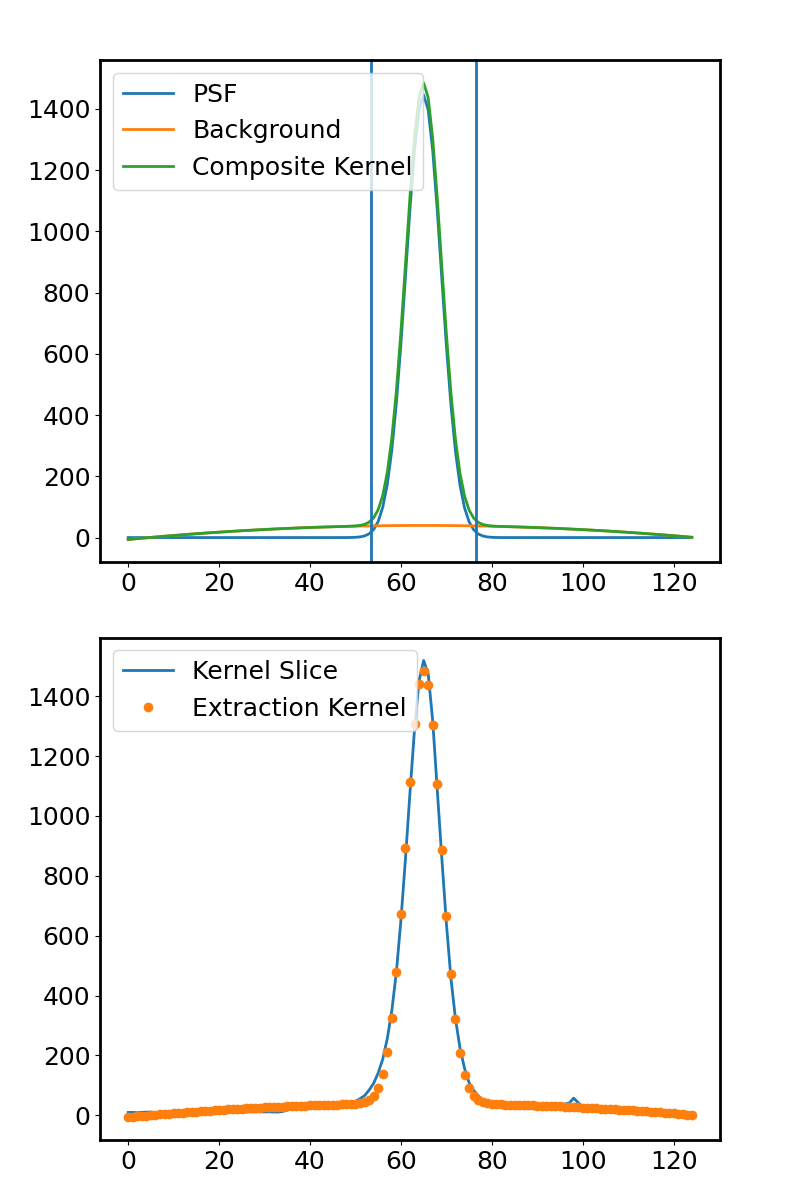

In [64]:
fitter = fitting.LevMarLSQFitter()
fit_extraction_kernel = fitter(extraction_kernel, xd_pixels, kernel_slice)
print(fit_extraction_kernel)
print(fit_extraction_kernel.mean_0)
vline1 = fit_extraction_kernel.mean_0-3*fit_extraction_kernel.stddev_0
vline2 = fit_extraction_kernel.mean_0+3*fit_extraction_kernel.stddev_0

fit_line = fit_extraction_kernel(xd_pixels)

fig6, (fax6, fln6) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
plt.subplots_adjust(hspace=0.15, top=0.95, bottom=0.05)
psf6 = fax6.plot(xd_pixels, fit_extraction_kernel[0](xd_pixels), label="PSF")
poly6 = fax6.plot(xd_pixels, fit_extraction_kernel[1](xd_pixels), label="Background")
sum6 = fax6.plot(xd_pixels, fit_line, label="Composite Kernel")
lgd6a = fax6.legend()
lin6 = fln6.plot(xd_pixels, kernel_slice, label='Kernel Slice')
fit6 = fln6.plot(xd_pixels, fit_line, 'o', label='Extraction Kernel')
fax6.axvline(vline1)
fax6.axvline(vline2)
lgd6b = fln6.legend()

In [315]:
from astropy.stats import sigma_clip

n_bin = 100#width_slider.value
bin_width = width_slider.value
#bin_width = er_nx // n_bin
n_bin = er_nx//bin_width
print(n_bin)
bin_centers = np.arange(0, er_nx, bin_width+1, dtype=float) + bin_width // 2
col_bin_centers = bin_centers.copy()
arr = np.arange(0, er_nx, bin_width+1, dtype=float)
print(bin_centers.shape,n_bin,bin_width,er_nx,arr.shape)
binned_spectrum = np.hstack([extraction_region[:, i:i+bin_width+1].sum(axis=1)[:, None] 
                                 for i in range(0, er_nx, bin_width+1)])
bin_fwhms = np.zeros_like(bin_centers, dtype=float)

print(binned_spectrum.shape)

for binc in range(col_bin_centers.size):
    bin_fit = fitter(fit_extraction_kernel, xd_pixels, binned_spectrum[:, binc])
    bin_fwhms[binc] = bin_fit.stddev_0.value
    
    
col_bin_centers.size,col_bin_centers.shape,xd_pixels.shape,bin_width

135
(132,) 135 30 4075 (132,)
(125, 132)


(132, (132,), (125,), 30)

<IPython.core.display.Javascript object>


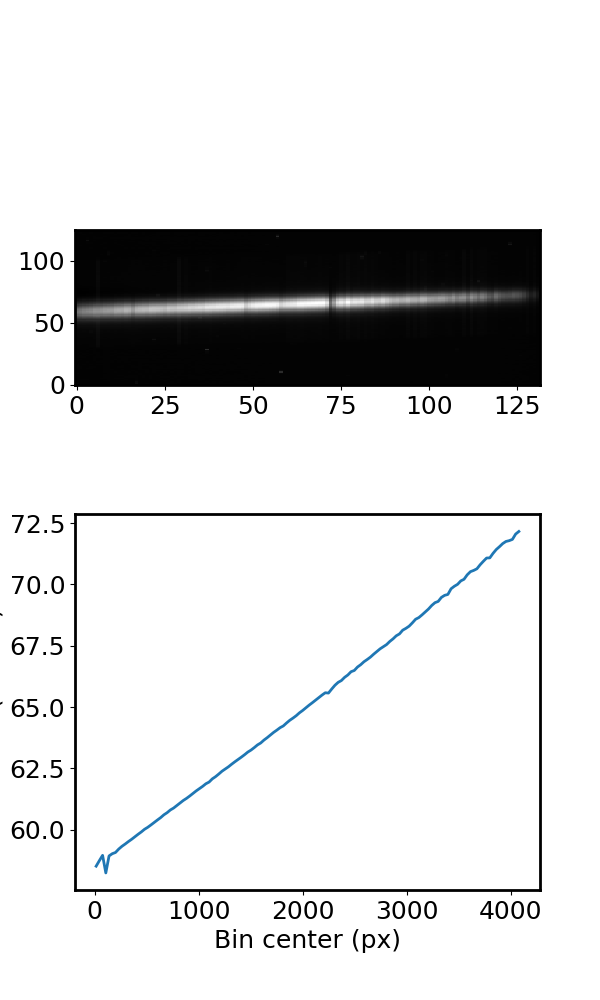

(132,)


In [317]:
row_bin_centers = []
row_bin_stddev = []
row_bin_amplitude = []
for y in range(bin_centers.size):
    bin_fit = fitter(fit_extraction_kernel, xd_pixels, binned_spectrum[:, y])
    bin_fwhms[y] = bin_fit.stddev_0.value
    row_bin_centers.append(bin_fit.mean_0.value)
    row_bin_stddev.append(bin_fit.stddev_0.value)
    row_bin_amplitude.append(bin_fit.amplitude_0.value)
    
bin_ny, bin_nx = binned_spectrum.shape
bin_ar = bin_nx / (3 * bin_ny)

fig_fwhm, ax_fwhm = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.05)
fwhm_img = ax_fwhm[0].imshow(binned_spectrum, aspect=bin_ar, interpolation='none',
                             cmap='gray',origin='lower')
fwhm_plot = ax_fwhm[1].plot(bin_centers, row_bin_centers)
xlbl_fwhm = ax_fwhm[1].set_xlabel("Bin center (px)")
ylbl_fwhm = ax_fwhm[1].set_ylabel("FWHM (arcsec)")
print(bin_fwhms.shape)

In [105]:
trace_center_model = models.Polynomial1D(1) #we use a constant because the spectrum has already been rectified
trace_center_model.c0 = fit_extraction_kernel.mean_0.value # use the parameter for center of the PSF profile
print(trace_center_model)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0         c1
    ----------------- ---
    64.98633946237736 0.0


In [301]:
scale = 1.0 # adjust this if and when the NIRSpec PIXFRAC changes

# We want any pixel with 0 weight to be excluded from the calculation
# in the next step, so we'll use masked array operations.
bad_pixels = weights_region == 0
masked_wht = np.ma.array(weights_region, mask=bad_pixels)
variance_image = np.ma.divide(1., weights_region * scale**4)
print(variance_image[20:])

[[0.0008775195447534969 0.0008691300798019438 0.0008775195447534969 ...
  0.0026768332251784553 0.0025215863070222355 0.0027504584097349555]
 [0.0008957411579490241 0.000877659574468085 0.0009005812842834919 ...
  0.0026853283424200505 0.002574705469298588 0.00260149783208514]
 [0.0009298917944093778 0.0009307572979833591 0.0008997709673901188 ...
  0.0025163946926948302 0.0024546265992264208 0.0026781366661256293]
 ...
 [0.027918781725888284 0.02391304347826084 0.020072992700729906 ...
  0.002639788816894648 0.002794715447154471 0.002689486552567237]
 [0.026294820717131493 0.03027522935779819 0.03444676409185807 ...
  0.0027545909849749583 0.0026593601418325413 0.002717167558666118]
 [0.031428571428571375 0.022312373225152105 0.020484171322160127 ...
  0.0026190476190476185 0.0027187345526445868 0.002794715447154471]]


<IPython.core.display.Javascript object>


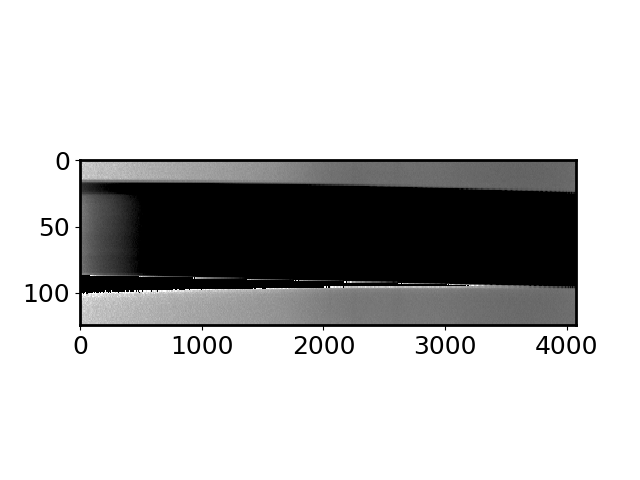

In [310]:
from copy import copy

fig_var = plt.figure()
palette = copy(plt.cm.gray)
palette.set_bad('r', alpha=0.7)
var_norm = simple_norm(variance_image, stretch='log', min_cut=0.0006, max_cut=0.1)
img_var = plt.imshow(variance_image, interpolation='none', aspect=aspect_ratio, norm=var_norm, cmap=palette)

In [118]:
x = np.append(np.arange(10, 200), np.arange(300, 480))

5

In [400]:
spectrum = np.zeros(er_nx, dtype=float) #initialize our spectrum with zeros
spectrum_t = spectrum.copy()
column_pixels = np.arange(er_nx)
trace_centers = trace_center_model(column_pixels) # calculate our trace centers array
bkg_cols = np.zeros_like(extraction_region)
rbc_i = -1
xrows = extraction_region.shape[0]
for x in column_pixels:
    # create the kernel for this column, using the fit trace centers
    kernel_column = fit_extraction_kernel.copy()
    kmean_i = kernel_column.mean_0
    kernel_column.mean_0 = row_bin_centers[rbc_i]#trace_centers[x]
    kernel_column.stddev_0 = row_bin_stddev[rbc_i]
    kernel_column.amplitude_0 = row_bin_amplitude[rbc_i]
    
   
    if x % len(row_bin_centers) == 0:
        #print(rbc_i)
        rbc_i+=1
        
    
    # kernel_column.stddev_0 = fwhm_fit(x) # if accounting for a varying FWHM, uncomment this line.
    # kernel_values = kernel_column(xd_pixels)
    xd_pixels_init = int(kernel_column.mean_0.value)-3*int(kernel_column.stddev_0.value)
    
    xd_pixels_end = int(kernel_column.mean_0.value)+3*int(kernel_column.stddev_0.value)
    
    rows_bg = np.append(np.arange(0,xd_pixels_init),
                                np.arange(xd_pixels_end,extraction_region.shape[0]))
    
    pfit = np.polyfit(rows_bg, extraction_region[rows_bg, x], 2) # Fit poly over bkg rows for col
    bkg_cols[:, x] = np.polyval(pfit, xrows) 
    image_pix = extraction_region[:,x]
    bgs_image = image_pix - np.polyval(pfit,xrows)
    kernel_values = kernel_column(xd_pixels[xd_pixels_init:xd_pixels_end])
    
    # isolate the relevant column in the spectrum and variance images
    variance_column = variance_image[xd_pixels_init:xd_pixels_end, x] # remember that numpy arrays are row, column
    image_pixels = extraction_region[xd_pixels_init:xd_pixels_end, x] - np.polyval(pfit,xrows)
    
    # calculate the kernal normalization
    g_x = np.ma.sum(kernel_values**2 / variance_column)
    if np.ma.is_masked(g_x): #this column isn't valid, so we'll skip it
        continue
    
    # and now sum the weighted column
    weighted_column = np.ma.divide(image_pixels * kernel_values, variance_column)
    spectrum[x] = np.ma.sum(weighted_column) / g_x
    spectrum_t[x] = bgs_image.sum(axis=0)

spectrum_t,spectrum,weighted_column,image_pixels*kernel_values,variance_column

(array([23223.40462284,  9120.39684171,  8951.12017648, ...,
         3060.01694397,  3392.63832681,  3826.70813085]),
 array([0.05627993, 0.03598011, 0.03562504, ..., 0.00138173, 0.00150728,
        0.00169039]),
 masked_array(data=[13373116.457345119, 15520853.29035786,
                    55501902.29729834, 148548442.00073463,
                    131767352.30708766, 301415017.239339, 626782514.673379,
                    674738694.3102494, 923048503.6857982,
                    1449369438.0763452, 1672046853.2920222,
                    2626359148.758958, 2952245090.047481,
                    2816570296.6158953, 3056104268.3020043,
                    4586939537.129962, 3701074467.6684666,
                    4025460988.056323, 4340842630.846701,
                    3473762245.690462, 3111670311.4890556,
                    2536614494.684076, 1683989315.2785056,
                    890851968.9787257],
              mask=[False, False, False, False, False, False, False, False,
     

<IPython.core.display.Javascript object>


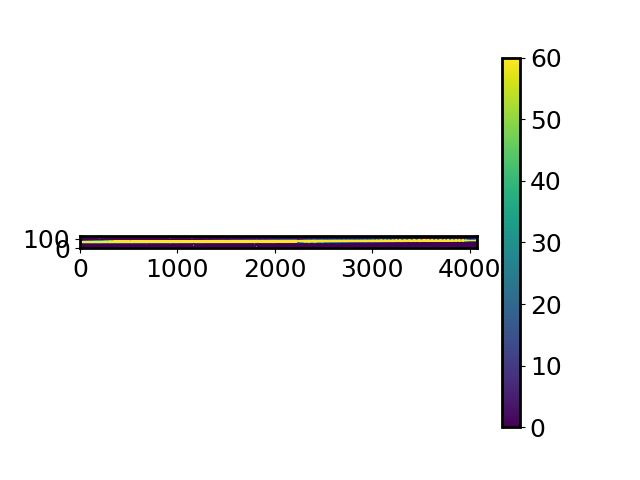

3.877881875030152
[ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124]


In [378]:
plt.figure()
b1,b2 = 0,fit_extraction_kernel.mean_0.value-3.5*fit_extraction_kernel.stddev_0.value
b3,b4 = fit_extraction_kernel.mean_0.value+3.5*fit_extraction_kernel.stddev_0.value,extraction_region.shape[0]
print(fit_extraction_kernel.stddev_0.value)
#plt.plot(np.arange(0,extraction_region.shape[0]),y2)
plt.axvline(b1)
plt.axvline(b2)
plt.axvline(b3)
plt.axvline(b4)
print(np.arange(int(b3),int(b4)))
rows_bg = np.asarray(np.concatenate([np.arange(int(b1),int(b2)),np.arange(int(b3),int(b4))]))
print(rows_bg)
y_bg = extraction_region[rows_bg,2037]
plt.plot(rows_bg,y_bg)
pfit = np.polyfit(rows_bg, y_bg, 2)  # Fit a 2nd order polynomial to (x, y) data
yfit = np.polyval(pfit, y_bg)
plt.plot(rows_bg, yfit,'k')
plt.ylim(-10,500)
plt.grid()

xrows = np.arange(extraction_region.shape[0])          # Array from 0 .. N_rows-1
bkg = np.zeros_like(extraction_region)                 # Empty image for background fits
for col in np.arange(extraction_region.shape[1]):      # For each column ...
    pfit = np.polyfit(rows_bg, extraction_region[rows_bg, col], 2) # Fit poly over bkg rows for col
    bkg[:, col] = np.polyval(pfit, xrows) 

<IPython.core.display.Javascript object>


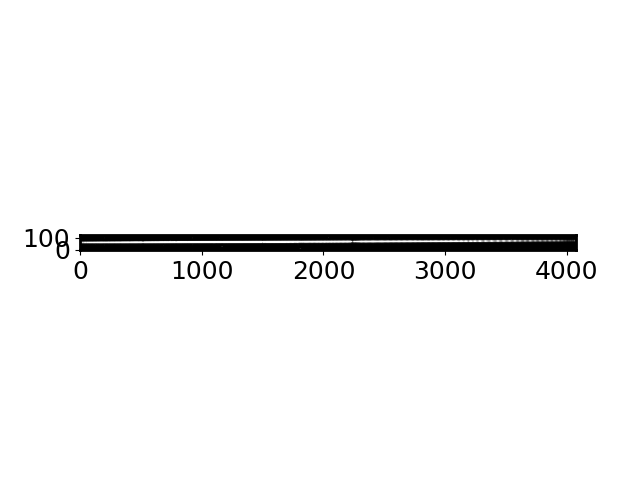

In [397]:
plt.figure()
img_bkg = extraction_region - bkg
plt.clf()
plt.imshow(img_bkg, origin = 'lower',cmap='gray',vmin=0.1,vmax=600,)
#plt.colorbar()

In [ ]:
len(row_bin_centers),column_pixels.shape[0]/815

<IPython.core.display.Javascript object>


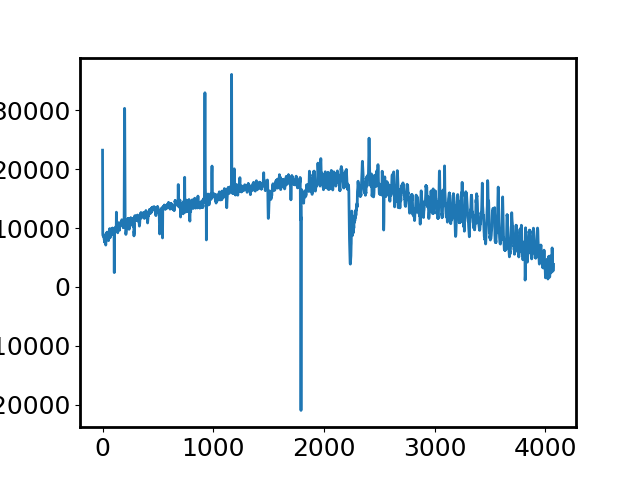

In [402]:
fig7 = plt.figure()
spec7 = plt.plot(column_pixels, spectrum_t)

In [14]:
sami_ccd = fits.open(
    "/Users/danakoeppe/PipelineProjects/Make_FITS_for_SAMOS/SAMI_reduction/SAMI_raw_data/2014-03-06/psa_140307_004211_ori.fits.fz")

In [16]:
sami_ccd.info()

Filename: /Users/danakoeppe/PipelineProjects/Make_FITS_for_SAMOS/SAMI_reduction/SAMI_raw_data/2014-03-06/psa_140307_004211_ori.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     157   ()      
  1  im1           1 CompImageHDU    145   (2163, 2056)   int16   
  2  im2           1 CompImageHDU    145   (2163, 2056)   int16   
  3  im3           1 CompImageHDU    145   (2163, 2056)   int16   
  4  im4           1 CompImageHDU    145   (2163, 2056)   int16   


In [17]:
sami_ccd[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2163 / length of data axis 1                          
NAXIS2  =                 2056 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
NEXTEND =                    4 / Number of extensions                           
IMAGEID =                    1 / Image identification                           
EXTNAME = 'im1     '           / Extension name                                 
FILENAME= '/home2/images/201